## SC-HW6-312657008-江祐姍

ex1

In [1]:
# 階層函數
def rec(n, m):
  if m == n:
    return 1
  elif m == 1:
    return n
  else:
    return rec(n-1,m-1) + rec(n-1,m)

from sympy import *
import sympy as sp
import math

p = symbols('p') #定義符號p

L = Function('L')(p) #定義函數L(p)

L = rec(3,2) * p * (1 - p)**2

L_diff = diff(L, p)
print('L的一階導函數:', L_diff)

L的一階導函數: 3*p*(2*p - 2) + 3*(1 - p)**2


In [2]:
solution = sp.solve(L_diff, p)
print('一階導函數為0時，p值:', solution)

一階導函數為0時，p值: [1/3, 1]


In [3]:
L_diff2 = diff(L_diff,p)
print('L的二階導函數:', L_diff2)
solution = sp.solve(L_diff2, p)
print('二階導函數為0時，p值:', solution)
print('將一階導數為0之p帶入二階導函數，結果為:')
L_diff2.subs(p,1/3), L_diff2.subs(p,1)
print('分別為當p=1/3和1的結果')

L的二階導函數: 18*p - 12
二階導函數為0時，p值: [2/3]
將一階導數為0之p帶入二階導函數，結果為:
分別為當p=1/3和1的結果


一階導數為0且二階導數為負時，有最大值，因此當p=1/3時有最大值  

ex2

In [4]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import comb

# Define the constants
r = 0.1  # Recombination rate for males
r_prime = 0.1  # Recombination rate for females

# Define the probabilities of genotypes in gametes without recombination
p_AB = (1 - r) / 2
p_Ab = r / 2
p_aB = r / 2
p_ab = (1 - r) / 2

# Define the probabilities of genotypes in gametes with recombination
p_AB_prime = (1 - r_prime) / 2
p_Ab_prime = r_prime / 2
p_aB_prime = r_prime / 2
p_ab_prime = (1 - r_prime) / 2

# Probabilities for the offspring genotypes
P_AABB = (1 - r) * (1 - r_prime) / 4
P_AaBb = (1 - r) * r_prime / 4
P_aABB = r * (1 - r_prime) / 4
P_aabb = r * r_prime / 4

# Define the multinomial probability mass function
def multinomial_pmf(n, p, k):
    """Calculate the probability mass function of the multinomial distribution."""
    return comb(n, k) * np.prod([p_i**k_i for p_i, k_i in zip(p, k)])

# Define the log-likelihood function for the multinomial distribution
def log_likelihood(params, data):
    r, r_prime = params
    n = np.sum(data)
    p = [
        (1 - r) * (1 - r_prime) / 4,
        (1 - r) * r_prime / 4,
        r * (1 - r_prime) / 4,
        r * r_prime / 4
    ]
    return -np.sum([k * np.log(p_i) for k, p_i in zip(data, p)])

# Example data from the document
data = [125, 18, 20, 24]  # Counts of each genotype in the offspring

# Initial guess for the parameters
initial_guess = [0.1, 0.1]

# Perform the maximum likelihood estimation (MLE)
result = minimize(log_likelihood, initial_guess, args=(data,), bounds=[(0, 0.5), (0, 0.5)])
r_est, r_prime_est = result.x

# Output the results
print('Male Recombination & Female Recombination:',r_est, r_prime_est,'by MLE')



Male Recombination & Female Recombination: 0.23529513351453277 0.22459875482899072 by MLE


In [5]:
import numpy as np
from scipy.special import comb

# 定義多項分佈的概率質量函數
def multinomial_pmf(n, p, k):
    """計算多項分佈的概率質量函數。"""
    return comb(n, k) * np.prod([p_i**k_i for p_i, k_i in zip(p, k)])

# E步：計算期望值
def e_step(data, r, r_prime):
    P_AABB = (1 - r) * (1 - r_prime) / 4
    P_AaBb = (1 - r) * r_prime / 4
    P_aABB = r * (1 - r_prime) / 4
    P_aabb = r * r_prime / 4
    P = [P_AABB, P_AaBb, P_aABB, P_aabb]
    n = np.sum(data)
    expected_counts = [p * n for p in P]
    return expected_counts

# M步：最大化期望值
def m_step(data, expected_counts):
    total_counts = np.sum(data)
    r = (expected_counts[2] + expected_counts[3]) / (2 * total_counts)
    r_prime = (expected_counts[1] + expected_counts[3]) / (2 * total_counts)
    return r, r_prime

# 初始化參數
r, r_prime = 0.1, 0.1  # 初始猜測

# 迭代次數
iterations = 100
tolerance = 1e-6

data = [125, 18, 20, 24]  # 後代中每種基因型的數

# EM算法迭代
for i in range(iterations):
    expected_counts = e_step(data, r, r_prime)
    r_new, r_prime_new = m_step(data, expected_counts)
    if np.abs(r_new - r) < tolerance and np.abs(r_prime_new - r_prime) < tolerance:
        break
    r, r_prime = r_new, r_prime_new

# 輸出結果
print('Male Recombination & Female Recombination:',r_est, r_prime_est,'by EM')


Male Recombination & Female Recombination: 0.23529513351453277 0.22459875482899072 by EM


https://en.wikipedia.org/wiki/Maximum_likelihood_estimation內例子

1.離散均勻分佈例子（German Tank Problem）: 估計 n 的最大概似估計值。
2.離散分佈，有限參數空間例子（Biased Coin Problem）: 根據有限的三個參數估計 p 的最大概似估計值。
3.離散分佈，連續參數空間例子（Biased Coin Problem）: 在連續參數空間中估計 p 的最大概似估計值。
4.連續分佈，連續參數空間例子（Normal Distribution）: 根據常態分佈數據估計 μ 和 σ 的最大概似估計值。

In [6]:
import numpy as np
from scipy.special import comb
from scipy.optimize import minimize

# Discrete Uniform Distribution Example: German Tank Problem
def german_tank_problem(m):
    return m

# Example
m = 5
n_hat = german_tank_problem(m)
print(f"Estimated n (German Tank Problem): {n_hat}")

# Discrete Distribution, Finite Parameter Space Example: Biased Coin
def biased_coin_likelihood(x, p):
    return comb(80, x) * (p ** x) * ((1 - p) ** (80 - x))

# Example
p_values = [1/3, 1/2, 2/3]
observed_heads = 49
likelihoods = [biased_coin_likelihood(observed_heads, p) for p in p_values]
best_p = p_values[np.argmax(likelihoods)]
print(f"Maximum Likelihood Estimate for p (finite parameter space): {best_p}")

# Discrete Distribution, Continuous Parameter Space Example: Biased Coin
def likelihood_continuous(p, x, n):
    return comb(n, x) * (p ** x) * ((1 - p) ** (n - x))

# Maximizing the likelihood function
def neg_log_likelihood(p, x, n):
    likelihood = likelihood_continuous(p, x, n)
    if likelihood == 0:
        return np.inf
    return -np.log(likelihood)

# Example
observed_heads = 49
n = 80
result = minimize(neg_log_likelihood, x0=0.5, args=(observed_heads, n), bounds=[(0.001, 0.999)])
best_p_continuous = result.x[0]
print(f"Maximum Likelihood Estimate for p (continuous parameter space): {best_p_continuous}")

# Continuous Distribution, Continuous Parameter Space Example: Normal Distribution
def normal_log_likelihood(params, data):
    mu, sigma = params
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * sum((data - mu)**2)
    return -log_likelihood

# Example
data = np.random.normal(5, 2, size=100)
initial_guess = [np.mean(data), np.std(data)]
result = minimize(normal_log_likelihood, x0=initial_guess, args=(data,), bounds=[(None, None), (0.001, None)])
mu_hat, sigma_hat = result.x
print(f"Maximum Likelihood Estimate for mu: {mu_hat}")
print(f"Maximum Likelihood Estimate for sigma: {sigma_hat}")



Estimated n (German Tank Problem): 5
Maximum Likelihood Estimate for p (finite parameter space): 0.6666666666666666
Maximum Likelihood Estimate for p (continuous parameter space): 0.6124999940525113
Maximum Likelihood Estimate for mu: 5.216865240200654
Maximum Likelihood Estimate for sigma: 1.9786972316546534


In [7]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# 定義正態分佈的對數似然函數
def log_likelihood_normal(params, data):
    mu, sigma = params
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(sigma**2) - 1/(2*sigma**2) * np.sum((data - mu)**2)
    return -log_likelihood  # 我們最小化負的對數似然函數

# 生成人工數據
np.random.seed(42)
data = np.random.normal(loc=5.0, scale=2.0, size=100)

# 初始猜測
initial_guess = [0, 1]

# 執行最大似然估計
result = minimize(log_likelihood_normal, initial_guess, args=(data,), bounds=[(None, None), (1e-6, None)])
mu_est, sigma_est = result.x

# 打印結果
print(f"估計的均值: {mu_est}")
print(f"估計的標準差: {sigma_est}")

# 為了對比，使用scipy內置的最大似然估計
mu_est_scipy, sigma_est_scipy = norm.fit(data)

# 打印內置方法的結果
print(f"內置方法估計的均值: {mu_est_scipy}")
print(f"內置方法估計的標準差: {sigma_est_scipy}")



估計的均值: 4.79230592455084
估計的標準差: 1.807232187812643
內置方法估計的均值: 4.792306965211812
內置方法估計的標準差: 1.8072323532892591


Other Methods

以下展示兩不同函數的結果

Parallel Chord Method: Root = 1.5213801183935927
Newton-Raphson Method: Root = 1.5213798059647863
Halley’s Method: Root = 1.5213797068045676
Bisection Method: Root = 1.5213851928710938
Secant Method: Root = 1.5213796947986198
Secant-Bracket Method: Root = 1.5213788584038939


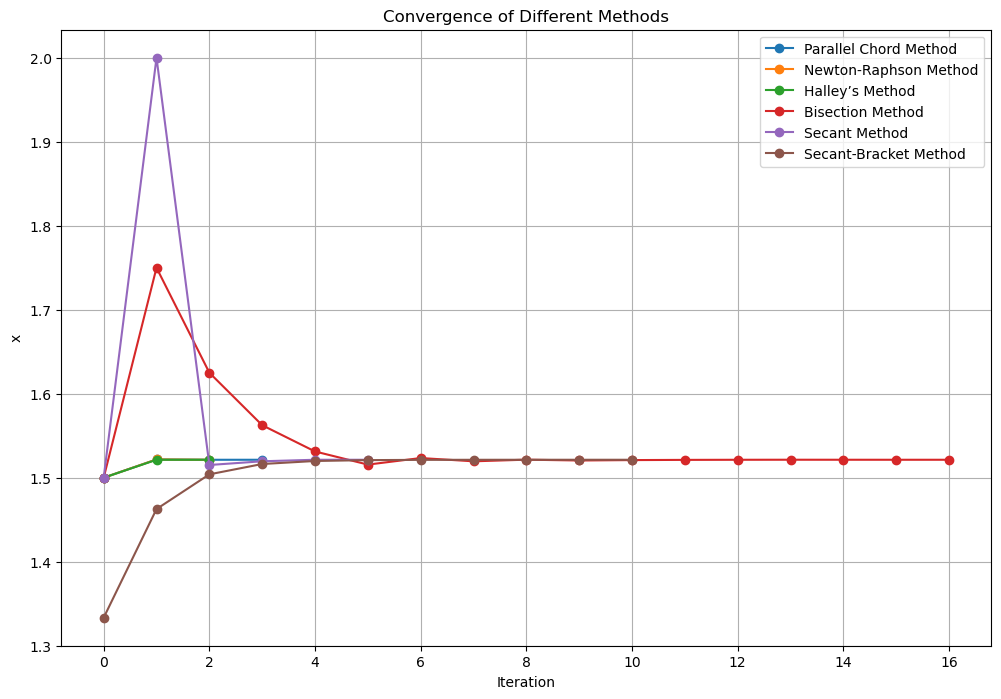

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 定義MLE的目標函數
def target_function(x):
    return x**3 - x - 2

def derivative_function(x):
    return 3*x**2 - 1

def second_derivative_function(x):
    return 6*x

# 平行弦方法
def parallel_chord_method(x0, tolerance=1e-5, max_iterations=100):
    x = x0
    history = [x]
    for _ in range(max_iterations):
        fx = target_function(x)
        if abs(fx) < tolerance:
            break
        x = x - fx / derivative_function(x0)
        history.append(x)
    return x, history

# 牛頓-拉夫森方法
def newton_raphson_method(x0, tolerance=1e-5, max_iterations=100):
    x = x0
    history = [x]
    for _ in range(max_iterations):
        fx = target_function(x)
        if abs(fx) < tolerance:
            break
        x = x - fx / derivative_function(x)
        history.append(x)
    return x, history

# 哈雷方法
def halleys_method(x0, tolerance=1e-5, max_iterations=100):
    x = x0
    history = [x]
    for _ in range(max_iterations):
        fx = target_function(x)
        dfx = derivative_function(x)
        ddfx = second_derivative_function(x)
        if abs(fx) < tolerance:
            break
        x = x - (2 * fx * dfx) / (2 * dfx**2 - fx * ddfx)
        history.append(x)
    return x, history

# 二分法
def bisection_method(a, b, tolerance=1e-5, max_iterations=100):
    history = []
    for _ in range(max_iterations):
        c = (a + b) / 2
        history.append(c)
        if target_function(c) == 0 or abs(a - b) / 2 < tolerance:
            break
        if np.sign(target_function(c)) == np.sign(target_function(a)):
            a = c
        else:
            b = c
    return c, history

# 割線法
def secant_method(x0, x1, tolerance=1e-5, max_iterations=100):
    history = [x0, x1]
    for _ in range(max_iterations):
        fx0 = target_function(x0)
        fx1 = target_function(x1)
        if abs(fx1) < tolerance:
            break
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
        history.append(x1)
    return x1, history

# 割線-括號法（Regula Falsi）
def secant_bracket_method(a, b, tolerance=1e-5, max_iterations=100):
    history = []
    fa, fb = target_function(a), target_function(b)
    for _ in range(max_iterations):
        c = b - fb * (b - a) / (fb - fa)
        fc = target_function(c)
        history.append(c)
        if abs(fc) < tolerance:
            break
        if np.sign(fc) == np.sign(fa):
            a, fa = c, fc
        else:
            b, fb = c, fc
    return c, history

# 繪圖函數
def plot_histories(histories, method_names):
    plt.figure(figsize=(12, 8))
    for history, method_name in zip(histories, method_names):
        plt.plot(history, 'o-', label=method_name)
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.title('Convergence of Different Methods')
    plt.legend()
    plt.grid(True)
    plt.show()

# 初始參數
x0 = 1.5
x1 = 2.0
a, b = 1, 2

# 執行數值方法並繪圖
methods = {
    'Parallel Chord Method': parallel_chord_method,
    'Newton-Raphson Method': newton_raphson_method,
    'Halley’s Method': halleys_method,
    'Bisection Method': bisection_method,
    'Secant Method': secant_method,
    'Secant-Bracket Method': secant_bracket_method
}

histories = []
method_names = []

# 執行每個方法並儲存歷史數據
for method_name, method in methods.items():
    if method_name in ['Bisection Method', 'Secant-Bracket Method']:
        result, history = method(a, b)
    elif method_name == 'Secant Method':
        result, history = method(x0, x1)
    else:
        result, history = method(x0)
    print(f'{method_name}: Root = {result}')
    histories.append(history)
    method_names.append(method_name)

# 繪製所有方法的收斂過程
plot_histories(histories, method_names)


可以看到每個方式的收斂速度有所差異parallel_chord_method, newton_raphson_method, Halley’s method相較下較穩定，不像其他的方法變動幅度較大。

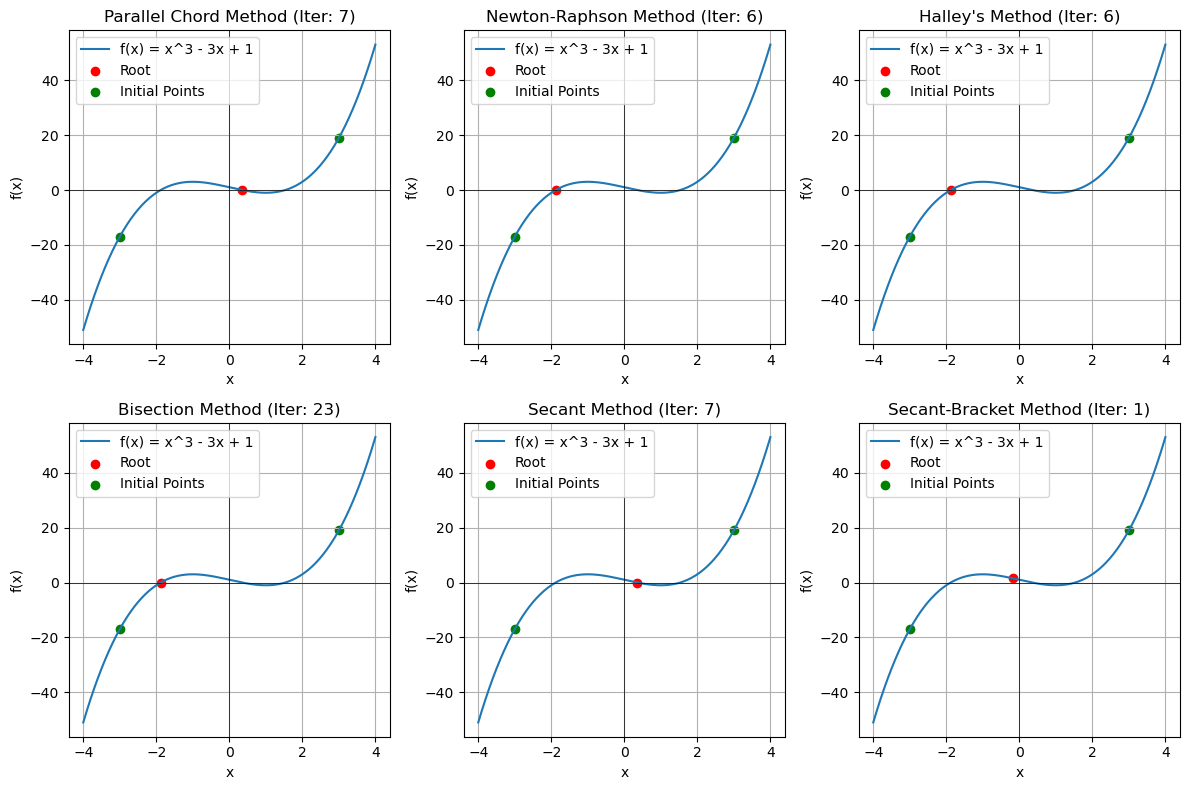

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 定義函數
def f(x):
    return x**3 - 3*x + 1

# 定義函數的導數
def df(x):
    return 3*x**2 - 3

# 平行弦法
def parallel_chord_method(x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            return x2, i+1
        x0, x1 = x1, x2
    return None, max_iter

# 牛頓-拉夫森法
def newton_raphson_method(x0, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
    return None, max_iter

# Halley's Method
def halley_method(x0, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        f_prime = df(x0)
        f_double_prime = 6*x0
        x1 = x0 - f(x0) / (f_prime - f(x0) * f_double_prime / (2*f_prime**2))
        if abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
    return None, max_iter

# 二分法
def bisection_method(a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        return None, max_iter
    for i in range(max_iter):
        c = (a + b) / 2
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, i+1
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return None, max_iter

# 割線法
def secant_method(x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            return x2, i+1
        x0, x1 = x1, x2
    return None, max_iter

# 割線-區間法
def secant_bracket_method(x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if f(x2) * f(x1) < 0:
            x0 = x1
        else:
            x1 = x2
        if abs(x2 - x1) < tol:
            return x2, i+1
    return None, max_iter

# 設定初始值
x0 = -3
x1 = 3

# 使用各種方法尋找根
methods = {
    "Parallel Chord Method": parallel_chord_method(x0, x1),
    "Newton-Raphson Method": newton_raphson_method(x0),
    "Halley's Method": halley_method(x0),
    "Bisection Method": bisection_method(x0, x1),
    "Secant Method": secant_method(x0, x1),
    "Secant-Bracket Method": secant_bracket_method(x0, x1)
}

# 繪製函數圖形
x = np.linspace(-4, 4, 400)
y = f(x)

plt.figure(figsize=(12, 8))

for i, (method, (root, iterations)) in enumerate(methods.items(), start=1):
    plt.subplot(2, 3, i)
    plt.plot(x, y, label='f(x) = x^3 - 3x + 1')
    plt.scatter(root, f(root), color='red', label='Root')
    plt.scatter([x0, x1], [f(x0), f(x1)], color='green', label='Initial Points')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(method + f' (Iter: {iterations})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


在固定某區間上，若是跟不只一個可能會造成找到不相同的答案。而且利用二方法要很迭代多次才能找到根。